In [1]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import os
import re
import string
import itertools
from collections import Counter

In [2]:
def process_subtitles(folderdir):
    """
    Given a directory of subtitle files, return list of lists where each sublist
    consists of the subtitles generated for an individual YouTube video.
    """
    
    filenames = os.listdir(folderdir)
    filenames = [folderdir + filename for filename in filenames]
    pattern = r'\d{2}:\d{2}:\d{2}.\d{3}\s-->\s\d{2}:\d{2}:\d{2}.\d{3}'
    
    lines_list = []
    for filename in filenames:
        with open(filename) as f:
            lines_list.append(f.readlines())
    
    processed_list = [] 
    for i in range(len(lines_list)):
        lines = [line.strip() for line in lines_list[i]]
        lines = [line for line in lines if line!=''][3:][:-1]
        lines = [line for line in lines if re.search(pattern, line) is None]
        lines = [line for line in lines if line.split(' ')[0] != "Translated"]
        processed_list.append(lines)  
        
    flattened_list = [list(itertools.chain.from_iterable([line.split(' ') for line in processed_list[i]])) for i in range(len(processed_list))]
    
    return processed_list, flattened_list
    
    

In [3]:
folder_input = "subtitlefiles2/"

In [4]:
flattened_list = process_subtitles(folder_input)[1]

In [5]:
processed_list = process_subtitles(folder_input)[0]

In [6]:
flattened_list[0][:10]

['Hey',
 'everyone,',
 'Phil',
 'from',
 'Wong',
 'Fu',
 'here,',
 'just',
 'want',
 'to']

Combine list of lists into one list

In [7]:
merged_list = list(itertools.chain.from_iterable(flattened_list))

In [8]:
len(merged_list)

78733

In [9]:
merged_list[:10]

['Hey',
 'everyone,',
 'Phil',
 'from',
 'Wong',
 'Fu',
 'here,',
 'just',
 'want',
 'to']

In [10]:
STOPWORDS = stopwords.words("english")

In [11]:
lowercase_list = [w.lower().strip(string.punctuation) for w in merged_list]

In [12]:
filtered_list = [w for w in lowercase_list if w not in STOPWORDS and w!='']

In [13]:
Counter(filtered_list).most_common(20)

[('like', 639),
 ('know', 575),
 ("i'm", 546),
 ('yeah', 418),
 ('oh', 403),
 ('right', 294),
 ("that's", 286),
 ('okay', 283),
 ('hey', 275),
 ('get', 275),
 ('one', 273),
 ('guys', 265),
 ('think', 261),
 ('go', 250),
 ('really', 246),
 ('want', 243),
 ('time', 241),
 ('well', 209),
 ('see', 202),
 ("we're", 201)]

In [14]:
from wordcloud import WordCloud

In [15]:
wc = " ".join(filtered_list)

In [16]:
wordcloud = WordCloud().generate(wc)

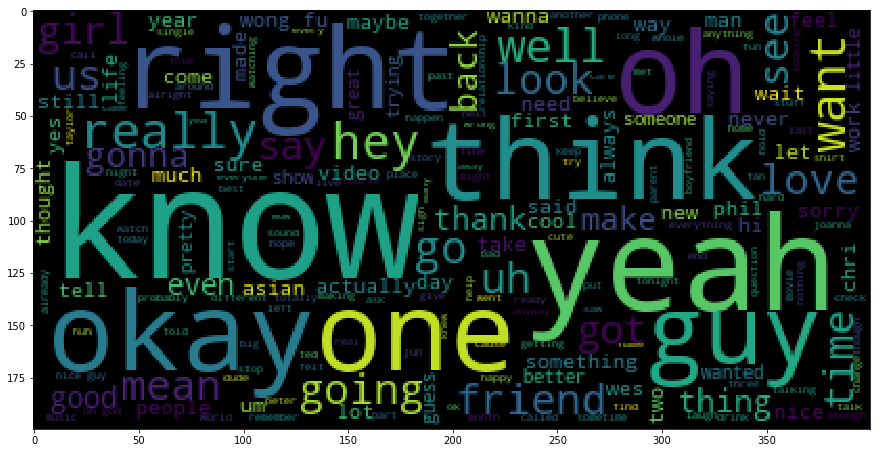

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)

Create a dictionary to store name of video and processed subtitles

In [18]:
d = dict()

In [19]:
videoname = os.listdir(folder_input)

In [20]:
for i, subtitle in enumerate(flattened_list):
    d[videoname[i]] = subtitle

Save to pickle file

https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file

In [21]:
import pickle

In [22]:
def save_obj(obj, name):
    with open('obj/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [23]:
save_obj(d, 'processed_video_subtitle2')

In [24]:
save_obj(processed_list, 'line_by_line_subtitle2')